In [3]:
'''
Created on Jan 4, 2013

@author: Carl Raymond
'''

from itertools import count
from sys import exit
from anytree import Node, RenderTree

def enum(**values):
    return type('Enum', (), values)

Tokens = enum(LPAREN=1, RPAREN=2, COMMA=3, SEMI=4, NAME=5)

def nameGenerator(prefix):
    for n in count(1):
        yield prefix + str(n)
        
def tokenize(treespec):
    name = []
    for c in treespec:
        if c == '(':
            yield (Tokens.LPAREN,)
        elif c == ')':
            yield (Tokens.NAME, "".join(name))
            name = []
            yield (Tokens.RPAREN,)
        elif c == ',':
            yield (Tokens.NAME, "".join(name))
            name = []
            yield (Tokens.COMMA,)
        elif c == ';':
            yield (Tokens.NAME, "".join(name))
            name = []
            yield (Tokens.SEMI,)
        else:
            name.append(c)

def specToGraph(spec):
    # Parse the spec, and build tree representation: a dictionary mapping a node to its parent node.
    graph = {}
    stack = []
    children = []
    name = None
    assignedNames = nameGenerator("V")
    prevToken = None
    for token in tokenize(treespec):
        ttype = token[0]
        if ttype == Tokens.LPAREN:
            stack.append(children)
            children = []
        elif ttype == Tokens.COMMA:
            pass
        elif ttype == Tokens.RPAREN:
            lastchildren = children
            children = stack.pop()
        elif ttype == Tokens.NAME:
            name = token[1] or assignedNames.__next__()
            if prevToken and prevToken[0] == Tokens.RPAREN:
                for child in lastchildren:
                    graph[child] = name
            children.append(name)
        elif ttype == Tokens.SEMI:
            pass

        prevToken = token
    return graph

def graphDistance(graph, node1, node2):
    # Follow chain of ancestors of node1 and node2 until they meet in a common ancestor.
    # Create list of ancestors of node1
    an = node1
    ancestors1 = []
    while an:
        ancestors1.append(an)
        if an not in graph: break;
        an = graph[an]
    
    # Create list of ancestors of node2. Short circuit when an ancestor is in ancestors1.
    an = node2
    ancestors2 = []
    while an:
        ancestors2.append(an)
        if an in ancestors1: return ancestors1.index(an) + len(ancestors2) - 1
        an = graph[an]
    
    
    
def writeGraphviz(graph, filename):
    # Write graphviz from internal representation
    with open(filename, "w+") as gvfile:
        gvfile.write("graph G { graph [overlap=false, splines=false]; \n")
        for node, parent in graph.items():
            gvfile.write ("{0} [label=\"{1}\"];\n".format(node, node.replace("_", "\\n")))
            gvfile.write("{0} -- {1}\n".format(node, parent))
        gvfile.write("}\n")

#with open("data/rosalind_ctbl.txt") as spec:
#    treespec = spec.readline().strip()
 
#treespec = "(dog,((elephant,mouse),robot),cat);"
treespec = "((Acanthoscurria_leucomelas,Eurynorhynchus_americanus),((Alloporus_variegatus,Synthliboramphus_euptilura),Chamaeleo_fissipes),(((((((((((((Ambystoma_ladogensis,((Chlamydotis_placidus,Limosa_ichthyaetus),(Ephibolus_sieboldii,(Eucratoscelus_spinifera,Pachytriton_dulkeitiana)))),(Gonyosoma_macrops,Platemys_macularius)),((((Buthus_hispida,((Elseya_serpentina,(((((((Lutra_celeber,Rufibrenta_thibetanus),(Pleurodeles_cepediana,Pterocles_decor)),Rhesus_marmorata),(Porzana_leucogeranus,Ziphius_ferruginea)),Numenius_nipalensis),Macrorhamphus_quinquestriatus),Pelodytes_gobio)),Sus_spaldingi)),(((Gerrhosaurus_ferina,Procellaria_leporosum),Plegadis_fuellebornii),Ptyodactylus_heliaca)),Himantopus_marmoratus),Chrysopelea_baibacina)),((Cuculus_vegans,Odonthurus_mongolica),Nhandu_isabellina)),Chrysopelea_novaeangliae),Holaspis_calvus),Larus_crassicauda),Corvus_boulengeri),(Desnana_lasiopterus,Scorpio_canorus)),Ameiva_bobac),(((Argynnis_melanuroides,(Cuon_sieboldii,Underwoodisaurus_rudicolis)),Emydura_anachoreta),(((Bombyx_resinifictrix,Saga_guangxiensis),(((Chelus_vulpes,(Coregonus_cyanea,Pelodiscus_czerskii)),Querquedula_cliffordii),Spizaetus_himalayanus)),Pandion_boyciana))),((Ameiva_punctatus,(((Archispirostreptus_cristata,Macrorhamphus_torquata),Rhynchophis_cinclus),Citharacanthus_parahybana)),(Oceanodroma_grossmani,Rhynchophis_opimus))),(Anthropoides_sinensis,((((((((((((Boa_opimus,Tropidurus_caninus),Cardiocranius_torquata),((Capella_penelope,(Liasis_weliczkowskii,Ophisops_dahurica)),Cyriopagopus_macqueni)),Streptopelia_ocellatus),((Monachus_filipjevi,Totanus_porphyrio),(Nyctixalus_heliaca,Tetrao_caniceps))),((Callipogon_porzana,(Cyclemys_erythrogastra,Pelecanus_thibetanus)),Homopholis_penelope)),Gambelia_cygnus),(Gypaetus_squaterola,Phrynohyas_taeniura)),(Eurynorhynchus_multifasciata,Heteroscodra_anatina)),((Enhydris_ruthveni,((((Hirundo_rosea,(Rangifer_dulkeitiana,Uncia_dauricus)),Plethodon_squaterola),Middendorffinaia_trianguligerus),Podoces_teniotis)),Python_onocrotalus)),Ctenotus_garmani),Ctenosaura_unicus))));"

print(treespec)
graph = specToGraph(treespec)




((Acanthoscurria_leucomelas,Eurynorhynchus_americanus),((Alloporus_variegatus,Synthliboramphus_euptilura),Chamaeleo_fissipes),(((((((((((((Ambystoma_ladogensis,((Chlamydotis_placidus,Limosa_ichthyaetus),(Ephibolus_sieboldii,(Eucratoscelus_spinifera,Pachytriton_dulkeitiana)))),(Gonyosoma_macrops,Platemys_macularius)),((((Buthus_hispida,((Elseya_serpentina,(((((((Lutra_celeber,Rufibrenta_thibetanus),(Pleurodeles_cepediana,Pterocles_decor)),Rhesus_marmorata),(Porzana_leucogeranus,Ziphius_ferruginea)),Numenius_nipalensis),Macrorhamphus_quinquestriatus),Pelodytes_gobio)),Sus_spaldingi)),(((Gerrhosaurus_ferina,Procellaria_leporosum),Plegadis_fuellebornii),Ptyodactylus_heliaca)),Himantopus_marmoratus),Chrysopelea_baibacina)),((Cuculus_vegans,Odonthurus_mongolica),Nhandu_isabellina)),Chrysopelea_novaeangliae),Holaspis_calvus),Larus_crassicauda),Corvus_boulengeri),(Desnana_lasiopterus,Scorpio_canorus)),Ameiva_bobac),(((Argynnis_melanuroides,(Cuon_sieboldii,Underwoodisaurus_rudicolis)),Emydura_a

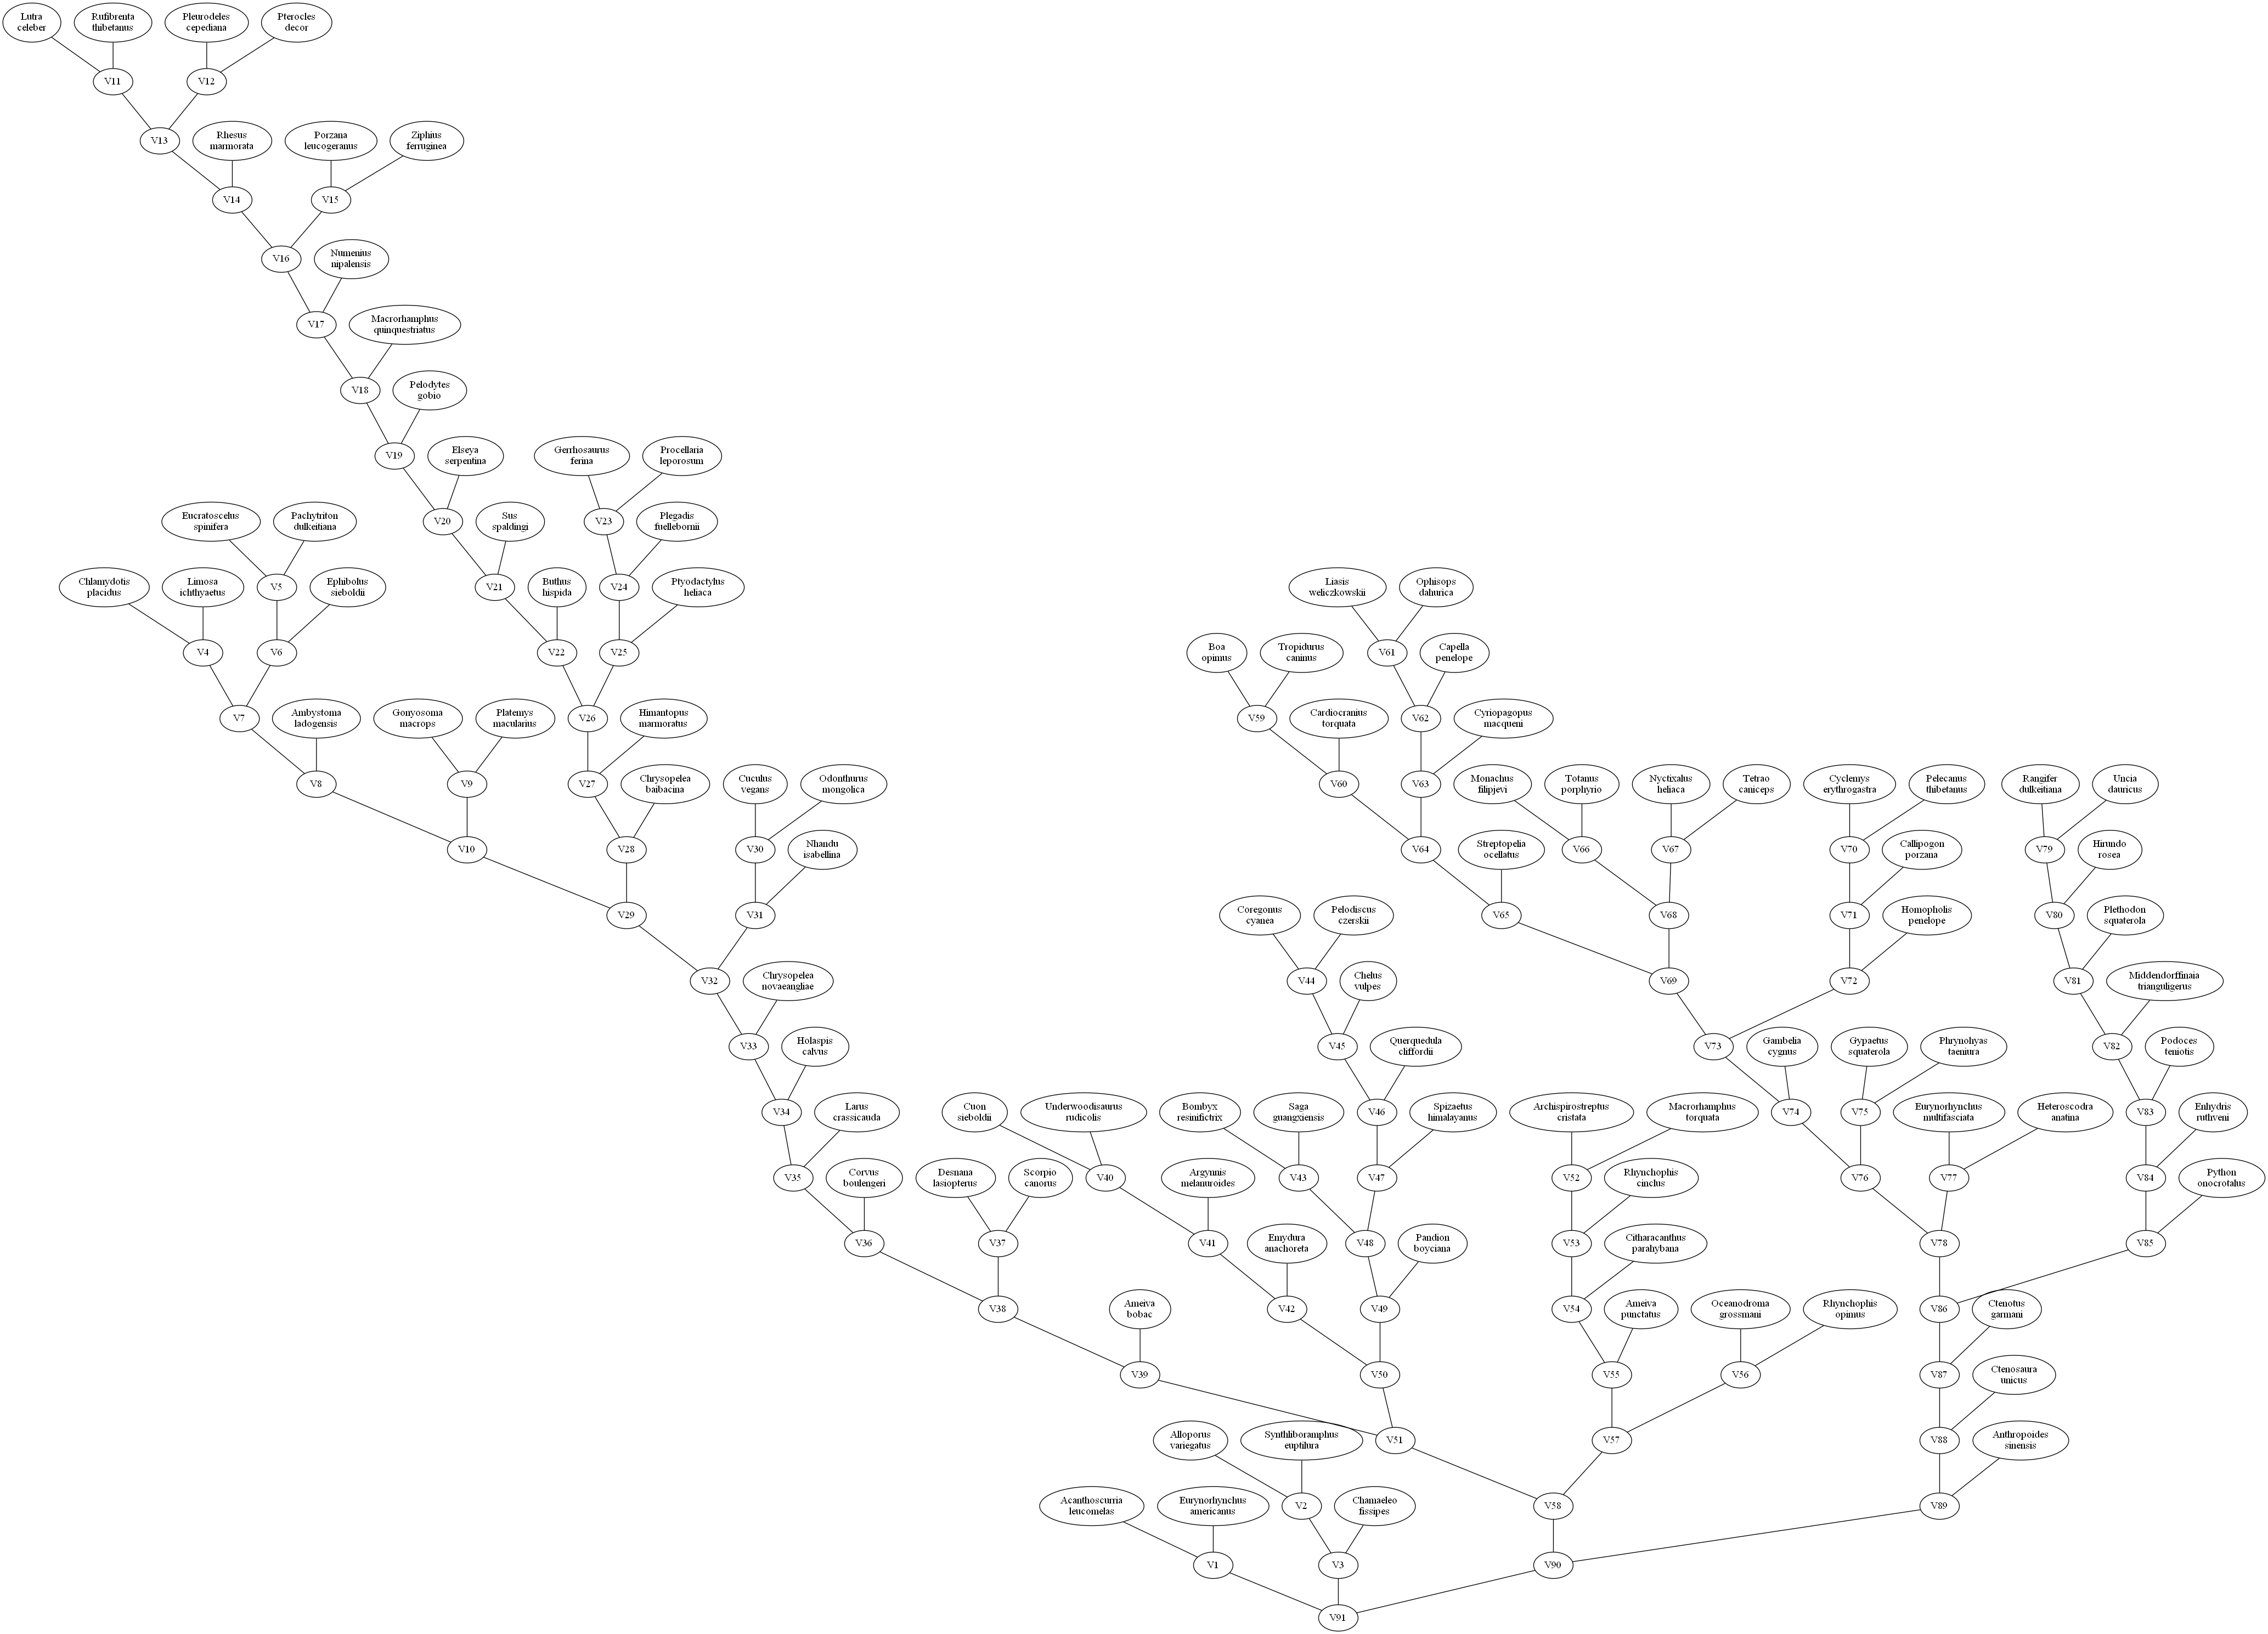

In [4]:
from IPython.display import Image
import graphviz

writeGraphviz(graph, "CTBL.gv")
graphviz.render('dot', 'png', 'CTBL.gv')
Image('CTBL.gv.png')
